# Plotting radial wave function for quark model

In [27]:
%run -i ../header.py
from PIL import Image
from scipy import special, integrate, misc

In [14]:
def plot(ax, name, cutoff=[-sp.inf, sp.inf], tol=1E-5):
    data = pd.read_csv(name, delimiter=",", index_col=0)
    data = data.loc[(data.index > cutoff[0]) & (data.index < cutoff[1])]
    ax.plot(data.index, data['u'], linestyle="", marker=".")
    points = data["u"].index.values[:-1][(data["u"].abs().values[1:] < tol) ^ (data["u"].abs().values[:-1] < tol)]
    ivals = list()
    if data["u"].abs().values[0] < tol:
        ivals.append(data.index.values[0:1])
    ivals.append(points)
    if data["u"].abs().values[-1] < tol:
        ivals.append(data.index.values[-1:])
    ivals = sp.hstack(ivals).reshape((-1,2))
    label = ""
    for ival in ivals:
        label += "{} —» {} [{}]\n".format(ival, ival[-1]-ival[0], ival.mean())
    #ax.text(0, 0, label)
    ax.axhline(0, ls="--", color="gray")
    for span in ivals:
        ax.axvspan(*span, alpha=0.2)
    return ax

In [3]:
def plotDir(name, cutoff=[-sp.inf, sp.inf], tol=1E-5):
    with open("output/" + name + "/exclude") as f:
        pcls = f.read().splitlines()
    fig, ax = plt.subplots(len(pcls), figsize=(plt.rcParams["figure.figsize"][0], plt.rcParams["figure.figsize"][1]*len(pcls)))
    cfg = json.load(open("output/"+name+"/config","r"), object_pairs_hook=OrderedDict)
    pcls = {key: val for key,val in cfg.items() if key in pcls}
    for theax, thef in zip(ax, pcls):
        try:
            rMax = cfg[thef]["rMax"]
        except KeyError:
            rMax = sp.inf
            
        try:
            tol = cfg[thef]["limit"]
        except KeyError:
            pass
        
        theax.set_title(thef+"("+str(tol)+")")
        plot(theax, "output/"+name+"/data/"+thef, [cutoff[0], min(cutoff[1], rMax)], tol)

In [4]:
def loadImage(name):
    img = Image.open("../data/{}.eps".format(name))
    img.load(scale=5)
    return sp.asarray(img, dtype=sp.uint8)

In [5]:
def plotPsiPhys(name, path, cutoff=sp.inf):
    prefix = "lin" if "lin" in list(filter(None, path.split("/")))[-1] else "scr"
    points = pd.read_csv(os.path.join(path, "data", name), index_col=0)
    norm = sp.integrate.trapz(points["u"]**2, points.index.values)
    points["u"] = points["u"]**2/norm/0.19732697
    points.index = points.index.values*0.19732697
    points = points.loc[points.index.values < cutoff]
    points.rename(columns={"u":"${}$ {}".format(code2name(name), prefix)}, inplace=True)
    return points

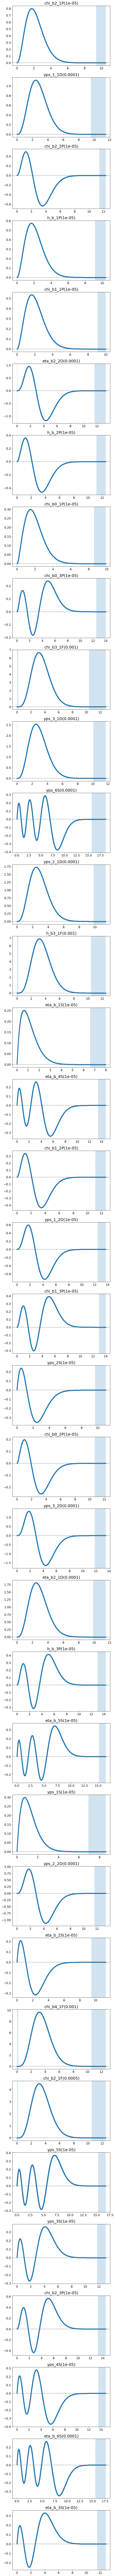

In [29]:
plotDir("scr.b-scr")

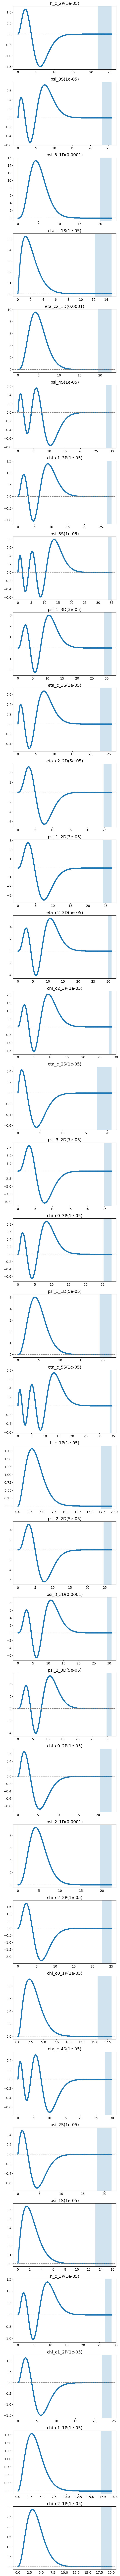

In [30]:
plotDir("scr.c-scr", [-sp.inf, sp.inf])

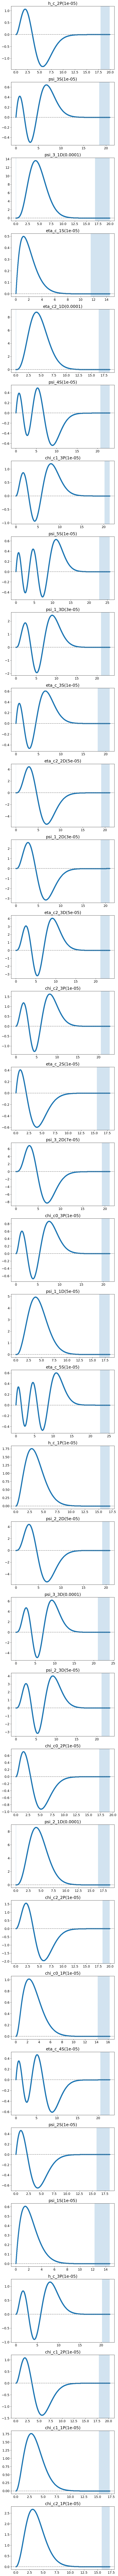

In [31]:
plotDir("lin.c-lin", [-sp.inf, sp.inf])

# Export

## Bottomonium. Screened

### S states

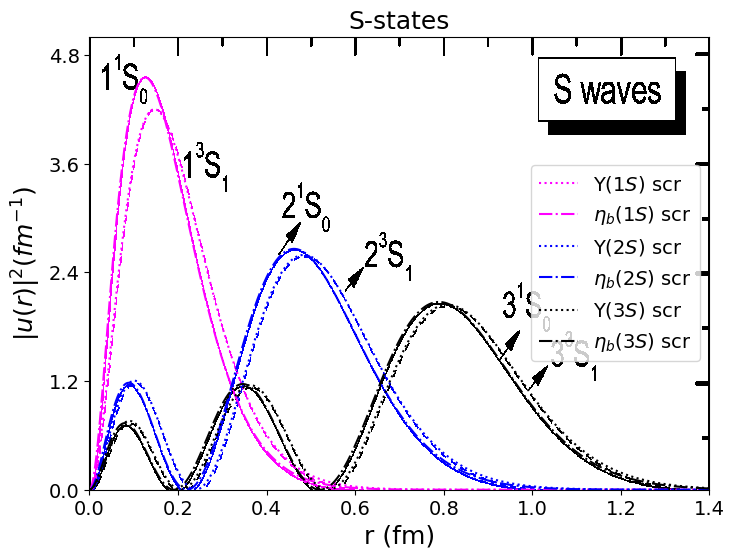

In [32]:
ax = plt.gca()
plt.imshow(loadImage("bot-wf")[425:1470, 390:2350], extent=(0,1.4,0,5), aspect="auto")
ax.set_yticks([0, 1.2, 2.4, 3.6, 4.8])
ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
ax.set_prop_cycle(
    cycler('color', ["fuchsia", "fuchsia", "blue", "blue", "black", "black"]) + \
    cycler('linestyle', [":", "-."]*3)
)
plotPsiPhys("yps_1S", "output/scr.b-scr/", 1.4).plot(ax=ax)
plotPsiPhys("eta_b_1S", "output/scr.b-scr/", 1.4).plot(ax=ax)
plotPsiPhys("yps_2S", "output/scr.b-scr/", 1.4).plot(ax=ax)
plotPsiPhys("eta_b_2S", "output/scr.b-scr/", 1.4).plot(ax=ax)
plotPsiPhys("yps_3S", "output/scr.b-scr/", 1.4).plot(ax=ax)
plotPsiPhys("eta_b_3S", "output/scr.b-scr/", 1.4).plot(ax=ax)
# plt.axvline(0.2)
# plt.axvline(1.2)
# plt.axhline(1.2)
# plt.axhline(3.6)
plt.legend(loc="center right")
plt.title("S-states")
plt.xlabel("r (fm)")
plt.ylabel("$|u(r)|^2 (fm^{-1})$")

plt.savefig("export/bot-s.eps")

### P-states

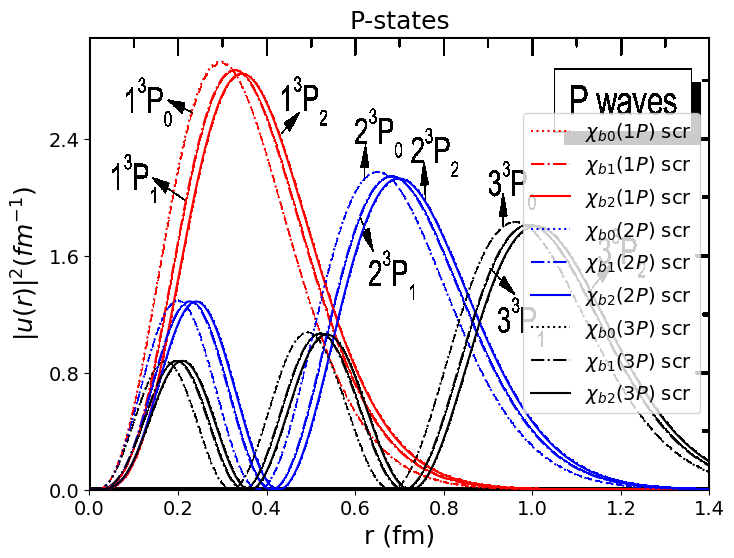

In [33]:
ax = plt.gca()
plt.imshow(loadImage("bot-wf")[1475:2530, 390:2350], extent=(0,1.4,0,3.1), aspect="auto")
ax.set_yticks([0, 0.8, 1.6, 2.4, 3.2])
ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
ax.set_prop_cycle(
    cycler('color', ["red"]*3+["blue"]*3+["black"]*3) + \
    cycler('linestyle', [":", "-.", "-"]*3)
)
plotPsiPhys("chi_b0_1P", "output/scr.b-scr/", 1.4).plot(ax=ax)
plotPsiPhys("chi_b1_1P", "output/scr.b-scr/", 1.4).plot(ax=ax)
plotPsiPhys("chi_b2_1P", "output/scr.b-scr/", 1.4).plot(ax=ax)
plotPsiPhys("chi_b0_2P", "output/scr.b-scr/", 1.4).plot(ax=ax)
plotPsiPhys("chi_b1_2P", "output/scr.b-scr/", 1.4).plot(ax=ax)
plotPsiPhys("chi_b2_2P", "output/scr.b-scr/", 1.4).plot(ax=ax)
plotPsiPhys("chi_b0_3P", "output/scr.b-scr/", 1.4).plot(ax=ax)
plotPsiPhys("chi_b1_3P", "output/scr.b-scr/", 1.4).plot(ax=ax)
plotPsiPhys("chi_b2_3P", "output/scr.b-scr/", 1.4).plot(ax=ax)
# plt.axvline(0.2)
# plt.axvline(1.2)
# plt.axhline(0.8)
# plt.axhline(2.4)
plt.legend(loc="center right")
plt.title("P-states")
plt.xlabel("r (fm)")
plt.ylabel("$|u(r)|^2 (fm^{-1})$")

plt.savefig("export/bot-p.eps")

### D-states

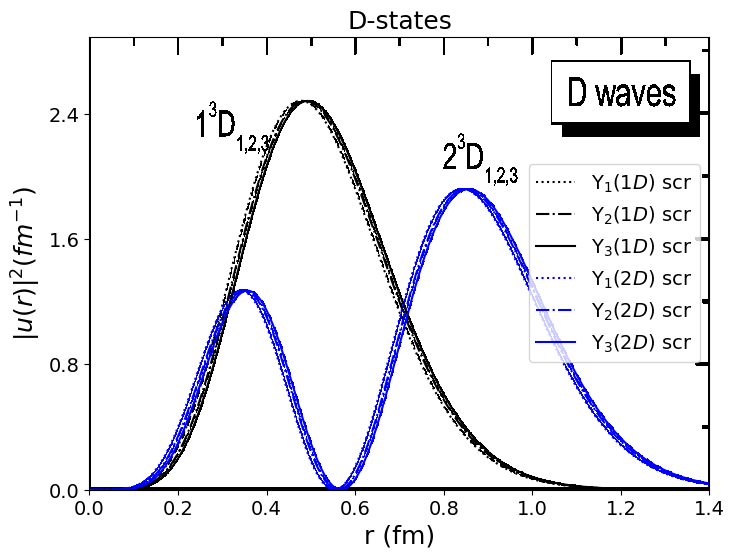

In [34]:
ax = plt.gca()
plt.imshow(loadImage("bot-wf")[2530:3580, 390:2350], extent=(0,1.4,0,2.89), aspect="auto")
ax.set_yticks([0, 0.8, 1.6, 2.4, 3.2])
ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
ax.set_prop_cycle(
    cycler('color', ["black"]*3+["blue"]*3) + \
    cycler('linestyle', [":", "-.", "-"]*2)
)
plotPsiPhys("yps_1_1D", "output/scr.b-scr/", 1.4).plot(ax=ax)
plotPsiPhys("yps_2_1D", "output/scr.b-scr/", 1.4).plot(ax=ax)
plotPsiPhys("yps_3_1D", "output/scr.b-scr/", 1.4).plot(ax=ax)
plotPsiPhys("yps_1_2D", "output/scr.b-scr/", 1.4).plot(ax=ax)
plotPsiPhys("yps_2_2D", "output/scr.b-scr/", 1.4).plot(ax=ax)
plotPsiPhys("yps_3_2D", "output/scr.b-scr/", 1.4).plot(ax=ax)
# plt.axvline(0.2)
# plt.axvline(1.2)
# plt.axhline(0.8)
# plt.axhline(2.4)
plt.legend(loc="center right")
plt.title("D-states")
plt.xlabel("r (fm)")
plt.ylabel("$|u(r)|^2 (fm^{-1})$")

plt.savefig("export/bot-d.eps")

## Charmonium. Screened + Linear

### S-states

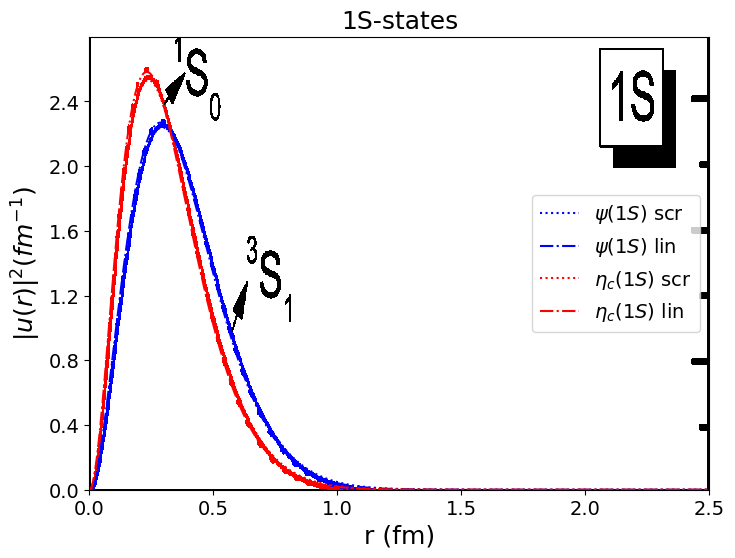

In [35]:
ax = plt.gca()
plt.imshow(loadImage("charm-wf-S")[340:1004,312:1880], extent=(0,2.5,0,2.8), aspect="auto")
ax.set_yticks([0, 0.4, 0.8, 1.2, 1.6, 2, 2.4])
ax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5])
ax.set_prop_cycle(
    cycler('color', ["blue"]*2 + ["red"]*2) + \
    cycler('linestyle', [":", "-."]*2)
)
plotPsiPhys("psi_1S", "output/scr.c-scr/", 2.5).plot(ax=ax)
plotPsiPhys("psi_1S", "output/lin.c-lin/", 2.5).plot(ax=ax)
plotPsiPhys("eta_c_1S", "output/scr.c-scr/", 2.5).plot(ax=ax)
plotPsiPhys("eta_c_1S", "output/lin.c-lin/", 2.5).plot(ax=ax)
# plt.axvline(0.5)
# plt.axvline(1.5)
# plt.axhline(0.4)
# plt.axhline(2)
plt.legend(loc="center right")
plt.title("1S-states")
plt.xlabel("r (fm)")
plt.ylabel("$|u(r)|^2 (fm^{-1})$")

plt.savefig("export/charm-1s.eps")

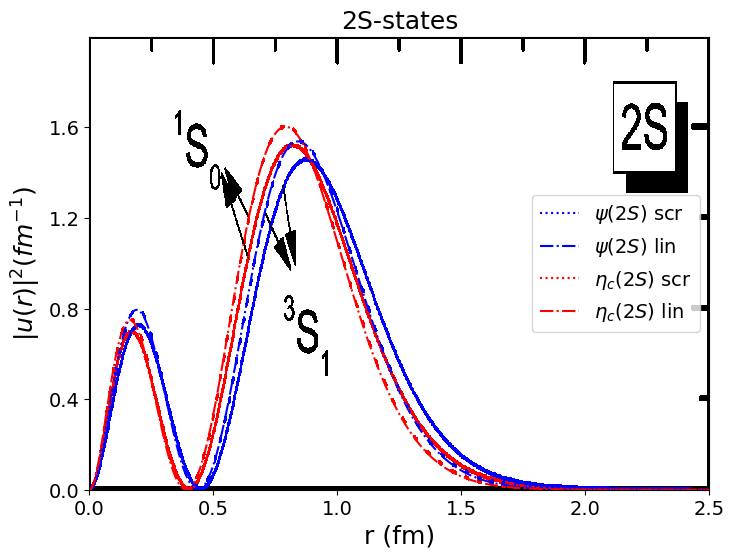

In [36]:
ax = plt.gca()
plt.imshow(loadImage("charm-wf-S")[1008:1730,312:1880], extent=(0,2.5,0,2), aspect="auto")
ax.set_yticks([0, 0.4, 0.8, 1.2, 1.6])
ax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5])
ax.set_prop_cycle(
    cycler('color', ["blue"]*2 + ["red"]*2) + \
    cycler('linestyle', [":", "-."]*2)
)
plotPsiPhys("psi_2S", "output/scr.c-scr/", 2.5).plot(ax=ax)
plotPsiPhys("psi_2S", "output/lin.c-lin/",2.5).plot(ax=ax)
plotPsiPhys("eta_c_2S", "output/scr.c-scr/",2.5).plot(ax=ax)
plotPsiPhys("eta_c_2S", "output/lin.c-lin/",2.5).plot(ax=ax)
# plt.axvline(0.5)
# plt.axvline(1.5)
# plt.axhline(0.4)
# plt.axhline(1.6)
plt.legend(loc="center right")
plt.title("2S-states")
plt.xlabel("r (fm)")
plt.ylabel("$|u(r)|^2 (fm^{-1})$")

plt.savefig("export/charm-2s.eps")

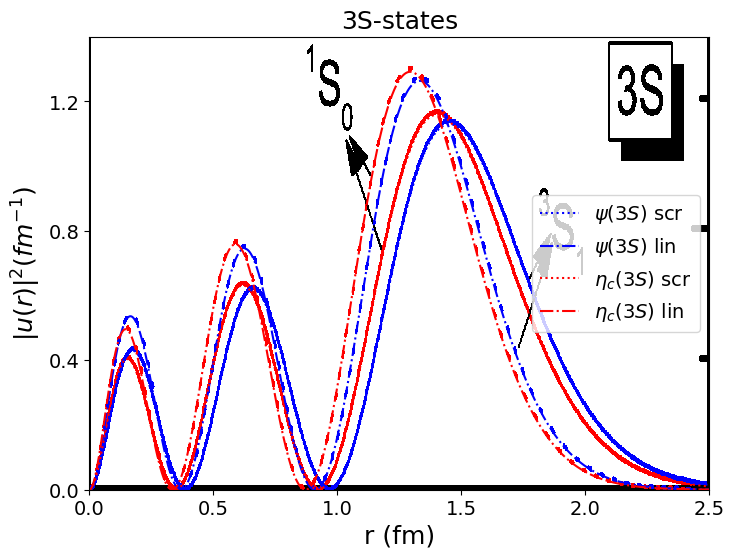

In [37]:
ax = plt.gca()
plt.imshow(loadImage("charm-wf-S")[1780:2450,312:1880], extent=(0,2.5,0,1.4), aspect="auto")
ax.set_yticks([0, 0.4, 0.8, 1.2])
ax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5])
ax.set_prop_cycle(
    cycler('color', ["blue"]*2 + ["red"]*2) + \
    cycler('linestyle', [":", "-."]*2)
)
plotPsiPhys("psi_3S", "output/scr.c-scr/",2.5).plot(ax=ax)
plotPsiPhys("psi_3S", "output/lin.c-lin/",2.5).plot(ax=ax)
plotPsiPhys("eta_c_3S", "output/scr.c-scr/",2.5).plot(ax=ax)
plotPsiPhys("eta_c_3S", "output/lin.c-lin/",2.5).plot(ax=ax)
# plt.axvline(0.5)
# plt.axvline(1.5)
# plt.axhline(0.4)
# plt.axhline(1.2)
plt.legend(loc="center right")
plt.title("3S-states")
plt.xlabel("r (fm)")
plt.ylabel("$|u(r)|^2 (fm^{-1})$")

plt.savefig("export/charm-3s.eps")

### P-states

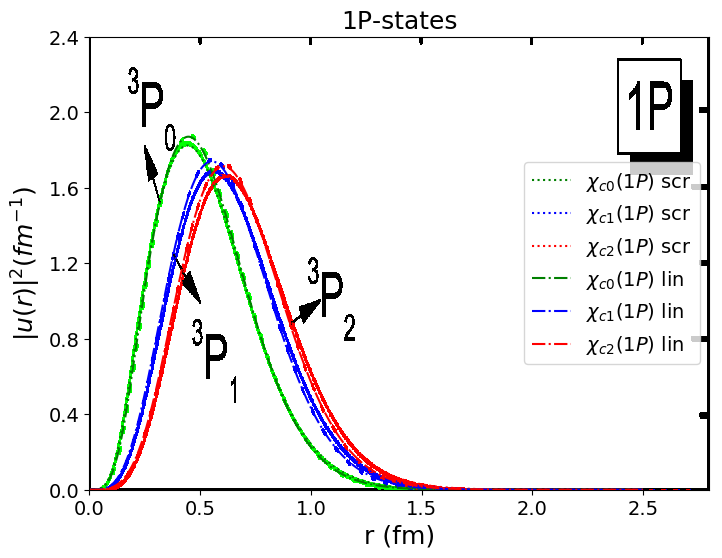

In [38]:
ax = plt.gca()
plt.imshow(loadImage("charm-wf-P")[320:1006,312:1880], extent=(0,2.8,0,2.4), aspect="auto")
ax.set_yticks([0, 0.4, 0.8, 1.2, 1.6, 2, 2.4])
ax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5])
ax.set_prop_cycle(
    cycler('color', (["green"]+ ["blue"] + ["red"])*2) + \
    cycler('linestyle', [":"]*3 + ["-."]*3)
)
plotPsiPhys("chi_c0_1P", "output/scr.c-scr/", 2.5).plot(ax=ax)
plotPsiPhys("chi_c1_1P", "output/scr.c-scr/", 2.5).plot(ax=ax)
plotPsiPhys("chi_c2_1P", "output/scr.c-scr/", 2.5).plot(ax=ax)
plotPsiPhys("chi_c0_1P", "output/lin.c-lin/", 2.5).plot(ax=ax)
plotPsiPhys("chi_c1_1P", "output/lin.c-lin/", 2.5).plot(ax=ax)
plotPsiPhys("chi_c2_1P", "output/lin.c-lin/", 2.5).plot(ax=ax)
# plt.axvline(0.5)
# plt.axvline(1.5)
# plt.axhline(0.4)
# plt.axhline(2)
plt.legend(loc="center right")
plt.title("1P-states")
plt.xlabel("r (fm)")
plt.ylabel("$|u(r)|^2 (fm^{-1})$")

plt.savefig("export/charm-1p.eps")

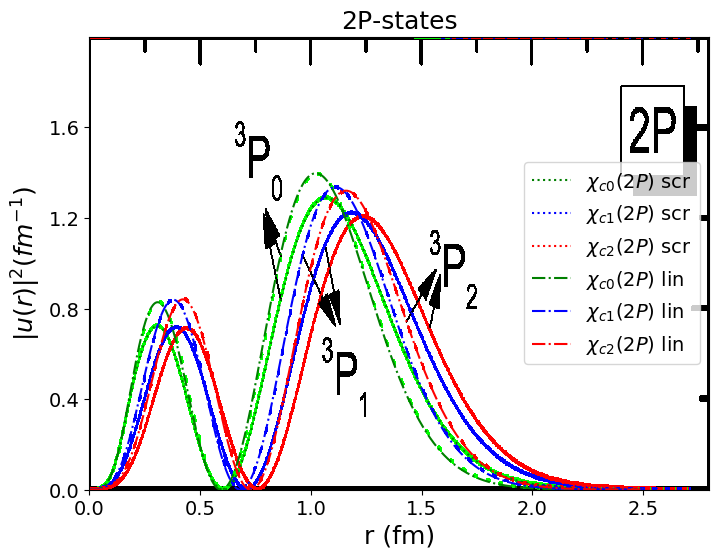

In [39]:
ax = plt.gca()
plt.imshow(loadImage("charm-wf-P")[1006:1730,312:1880], extent=(0,2.8,0,2), aspect="auto")
ax.set_yticks([0, 0.4, 0.8, 1.2, 1.6])
ax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5])
ax.set_prop_cycle(
    cycler('color', (["green"]+ ["blue"] + ["red"])*2) + \
    cycler('linestyle', [":"]*3 + ["-."]*3)
)
plotPsiPhys("chi_c0_2P", "output/scr.c-scr/", 2.5).plot(ax=ax)
plotPsiPhys("chi_c1_2P", "output/scr.c-scr/", 2.5).plot(ax=ax)
plotPsiPhys("chi_c2_2P", "output/scr.c-scr/", 2.5).plot(ax=ax)
plotPsiPhys("chi_c0_2P", "output/lin.c-lin/", 2.5).plot(ax=ax)
plotPsiPhys("chi_c1_2P", "output/lin.c-lin/", 2.5).plot(ax=ax)
plotPsiPhys("chi_c2_2P", "output/lin.c-lin/", 2.5).plot(ax=ax)
# plt.axvline(0.5)
# plt.axvline(1.5)
# plt.axhline(0.4)
# plt.axhline(1.6)
plt.legend(loc="center right")
plt.title("2P-states")
plt.xlabel("r (fm)")
plt.ylabel("$|u(r)|^2 (fm^{-1})$")

plt.savefig("export/charm-2p.eps")

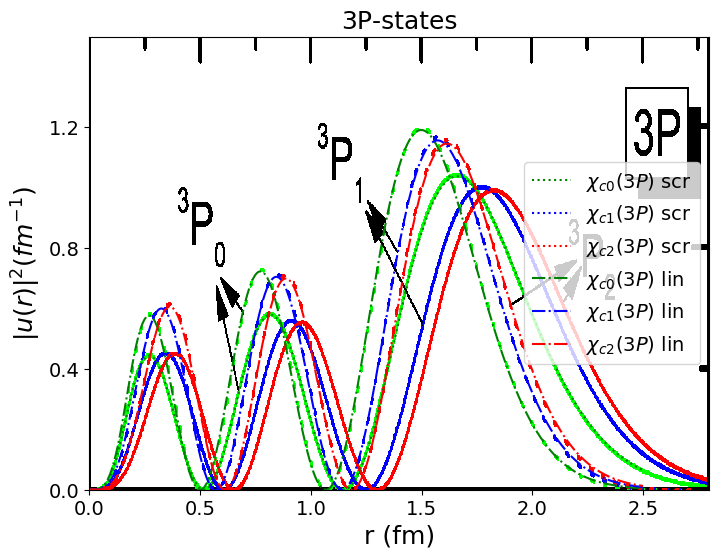

In [40]:
ax = plt.gca()
plt.imshow(loadImage("charm-wf-P")[1730:2448,312:1880], extent=(0,2.8,0,1.5), aspect="auto")
ax.set_yticks([0, 0.4, 0.8, 1.2, 1.6])
ax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5])
ax.set_prop_cycle(
    cycler('color', (["green"]+ ["blue"] + ["red"])*2) + \
    cycler('linestyle', [":"]*3 + ["-."]*3)
)
plotPsiPhys("chi_c0_3P", "output/scr.c-scr/", 2.5).plot(ax=ax)
plotPsiPhys("chi_c1_3P", "output/scr.c-scr/", 2.5).plot(ax=ax)
plotPsiPhys("chi_c2_3P", "output/scr.c-scr/", 2.5).plot(ax=ax)
plotPsiPhys("chi_c0_3P", "output/lin.c-lin/", 2.5).plot(ax=ax)
plotPsiPhys("chi_c1_3P", "output/lin.c-lin/", 2.5).plot(ax=ax)
plotPsiPhys("chi_c2_3P", "output/lin.c-lin/", 2.5).plot(ax=ax)
# plt.axvline(0.5)
# plt.axvline(1.5)
# plt.axhline(0.4)
# plt.axhline(1.2)
plt.legend(loc="center right")
plt.title("3P-states")
plt.xlabel("r (fm)")
plt.ylabel("$|u(r)|^2 (fm^{-1})$")

plt.savefig("export/charm-3p.eps")

### D-states

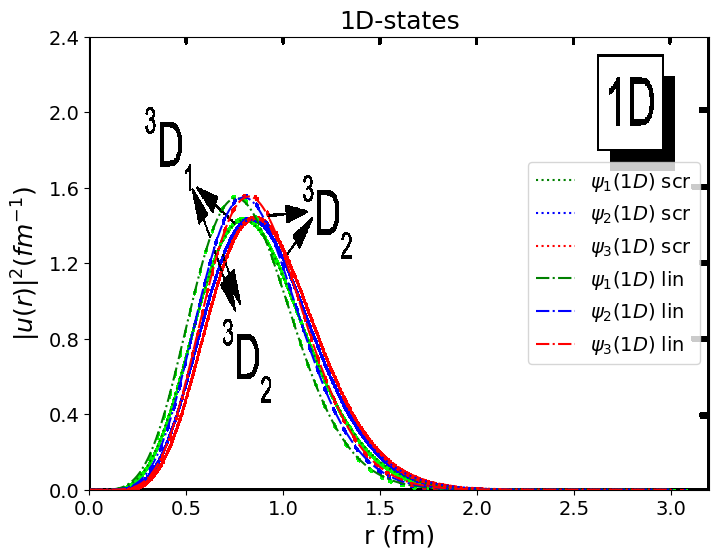

In [41]:
ax = plt.gca()
plt.imshow(loadImage("charm-wf-D")[320:1006,312:1880], extent=(0,3.2,0,2.4), aspect="auto")
ax.set_yticks([0, 0.4, 0.8, 1.2, 1.6, 2, 2.4])
ax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5])
ax.set_prop_cycle(
    cycler('color', (["green"]+ ["blue"] + ["red"])*2) + \
    cycler('linestyle', [":"]*3 + ["-."]*3)
)
plotPsiPhys("psi_1_1D", "output/scr.c-scr/", 3).plot(ax=ax)
plotPsiPhys("psi_2_1D", "output/scr.c-scr/", 3).plot(ax=ax)
plotPsiPhys("psi_3_1D", "output/scr.c-scr/", 3).plot(ax=ax)
plotPsiPhys("psi_1_1D", "output/lin.c-lin/", 3).plot(ax=ax)
plotPsiPhys("psi_2_1D", "output/lin.c-lin/", 3).plot(ax=ax)
plotPsiPhys("psi_3_1D", "output/lin.c-lin/", 3).plot(ax=ax)
# plt.axvline(0.5)
# plt.axvline(1.5)
# plt.axhline(0.4)
# plt.axhline(2)
plt.legend(loc="center right")
plt.title("1D-states")
plt.xlabel("r (fm)")
plt.ylabel("$|u(r)|^2 (fm^{-1})$")

plt.savefig("export/charm-1d.eps")

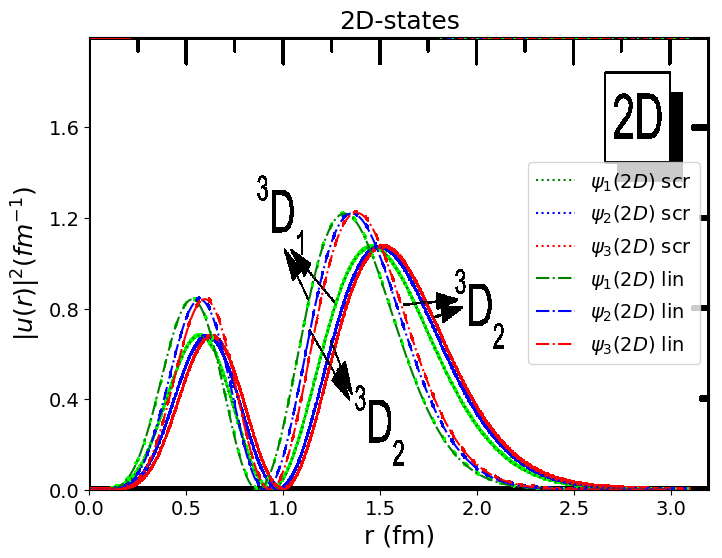

In [42]:
ax = plt.gca()
plt.imshow(loadImage("charm-wf-D")[1006:1730,312:1880], extent=(0,3.2,0,2), aspect="auto")
ax.set_yticks([0, 0.4, 0.8, 1.2, 1.6])
ax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5, 3])
ax.set_prop_cycle(
    cycler('color', (["green"]+ ["blue"] + ["red"])*2) + \
    cycler('linestyle', [":"]*3 + ["-."]*3)
)
plotPsiPhys("psi_1_2D", "output/scr.c-scr/", 3).plot(ax=ax)
plotPsiPhys("psi_2_2D", "output/scr.c-scr/", 3).plot(ax=ax)
plotPsiPhys("psi_3_2D", "output/scr.c-scr/", 3).plot(ax=ax)
plotPsiPhys("psi_1_2D", "output/lin.c-lin/", 3).plot(ax=ax)
plotPsiPhys("psi_2_2D", "output/lin.c-lin/", 3).plot(ax=ax)
plotPsiPhys("psi_3_2D", "output/lin.c-lin/", 3).plot(ax=ax)
# plt.axvline(0.5)
# plt.axvline(1.5)
# plt.axhline(0.4)
# plt.axhline(1.6)
plt.legend(loc="center right")
plt.title("2D-states")
plt.xlabel("r (fm)")
plt.ylabel("$|u(r)|^2 (fm^{-1})$")

plt.savefig("export/charm-2d.eps")

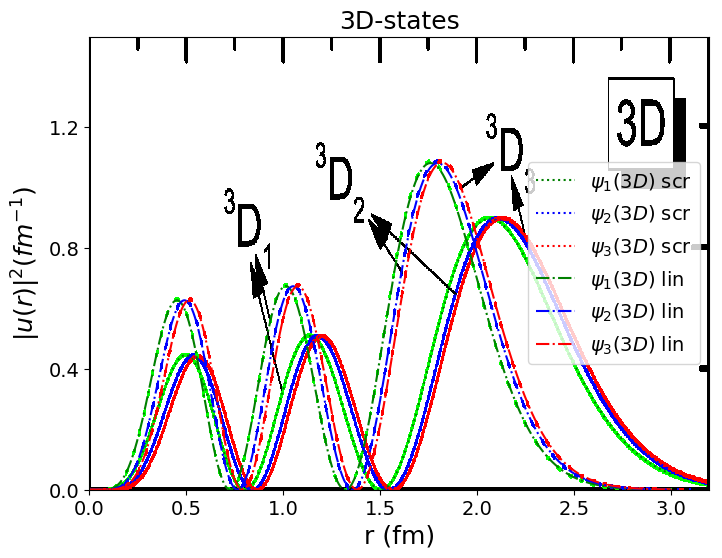

In [44]:
ax = plt.gca()
plt.imshow(loadImage("charm-wf-D")[1730:2448,312:1880], extent=(0,3.2,0,1.5), aspect="auto")
ax.set_yticks([0, 0.4, 0.8, 1.2, 1.6])
ax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5, 3])
ax.set_prop_cycle(
    cycler('color', (["green"]+ ["blue"] + ["red"])*2) + \
    cycler('linestyle', [":"]*3 + ["-."]*3)
)
plotPsiPhys("psi_1_3D", "output/scr.c-scr/", 3).plot(ax=ax)
plotPsiPhys("psi_2_3D", "output/scr.c-scr/", 3).plot(ax=ax)
plotPsiPhys("psi_3_3D", "output/scr.c-scr/", 3).plot(ax=ax)
plotPsiPhys("psi_1_3D", "output/lin.c-lin/", 3).plot(ax=ax)
plotPsiPhys("psi_2_3D", "output/lin.c-lin/", 3).plot(ax=ax)
plotPsiPhys("psi_3_3D", "output/lin.c-lin/", 3).plot(ax=ax)
# plt.axvline(0.5)
# plt.axvline(1.5)
# plt.axhline(0.4)
# plt.axhline(1.2)
plt.legend(loc="center right")
plt.title("3D-states")
plt.xlabel("r (fm)")
plt.ylabel("$|u(r)|^2 (fm^{-1})$")

plt.savefig("export/charm-3d.eps")